<a href="https://colab.research.google.com/github/AnnaLz/Perceptron/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementação de um Perceptron utilizando Python**

---

###Tarefa 05 - Inteligência Artificial

Anna Luiza Pereira Rosa - 2019004090<br>
João Vitor de Faria - 2019006030

#Exercício

---




*   Utilizando o módulo `make_blobs`, gere dois novos conjuntos alterando o parâmetro `random_state` para o valor de 6 e 30.
*   Varie o número de épocas do Perceptron em 10, 50 e 100 e a taxa de aprendizado em 0.02 e 0.003.
*   Para cada base gerada e cada configuração de Perceptron, mostre o gráfico das atualizações por época e a fronteira de decisão gerada, explicando o comportamento do modelo em função da convergência.

---

#Implementação

### &bull; Importação das bibliotecas

In [38]:
import numpy as np                                                      # biblioteca matemática
import matplotlib.pyplot as plt                                         # biblioteca para criação e visualização de gráficos
from mlxtend.plotting import plot_decision_regions                      # biblioteca com extensões para aprendizagem de máquina
from sklearn.datasets import make_blobs                                 # biblioteca para aplicação de aprendizagem de máquina

### &bull; Definição da classe Perceptron

In [39]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta                                                  # representa a taxa de aprendizagem do neurônio
        self.n_iter = n_iter                                            # número de épocas (interações)
        self.random_state = random_state                                # semente para o gerador de números aleatórios para iniciar os pesos

    def fit(self, X, y):                                                # função que aprende com os dados de treino
        rgen = np.random.RandomState(self.random_state)                 # método que gera os números aleatórios
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])   # 1d array os pesos depois do aprendizado
        self.errors_ = []                                               # lista do número de classificações erradas em cada época
        for _ in range(self.n_iter):                                    # aprendizagem do neurônio através da sua equação de ajuste de pesos
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0:] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    ''' X = {n_amostras, n_atributos} é um vetor de treinamento que contém o número de amostras do conjunto de dados e o número de atributos 
     do conjunto e y = [n_amostras] são os valores objetivos. Essa função retorna um objeto.'''
                                                                      
    def net_input(self, X):                                             # função que calcula a entrada da rede, que é dada pelo somatório dos valores
        return np.dot(X, self.w_[1:]) + self.w_[0]                      # das entradas multiplicados pelos pesos de cada conexão
    
    def predict(self, X):                                               # retorna o rótulo da classe utilizando a função degrau
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Primeiro Conjunto
*random_state:* 6

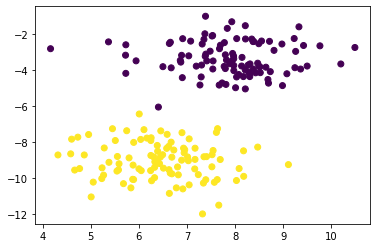

In [40]:
blobs = make_blobs(n_samples=200, n_features=2, centers=2, random_state=6)
plt.scatter(blobs[0][:,0], blobs[0][:,1], c=blobs[1])
plt.show()

###Taxa de aprendizado: 0.02

#### &bull; Com 10 épocas

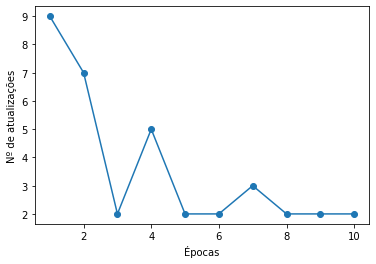

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


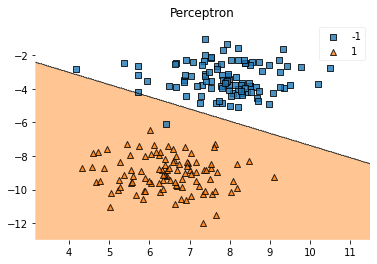

In [41]:
ppn = Perceptron(n_iter=10, eta=0.02)
X = blobs[0]                                                            # entrada dos dados
y = blobs[1]                                                            # saída dos dados
y[y == 0] = -1                                                          # substituir as classes 0 e 1 para 1 e -1
ppn.fit(X, y)                                                           # treinando o perceptron; classe 1 é a que desejamos encontrar

plt.plot(range(1, len(ppn.errors_) +1),                                 # plotando o gráfico de atualizações por época
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

plot_decision_regions(X, y, clf=ppn)                                    # plotando a fronteira de decisão
plt.title('Perceptron')
plt.show()

#### &bull; Com 50 épocas

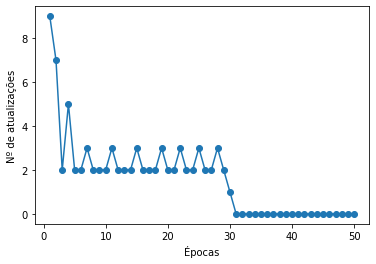

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


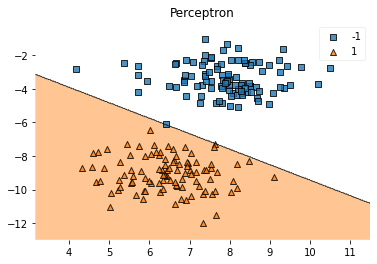

In [42]:
ppn = Perceptron(n_iter=50, eta=0.02)
X = blobs[0]                                                            # entrada dos dados
y = blobs[1]                                                            # saída dos dados
y[y == 0] = -1                                                          # substituir as classes 0 e 1 para 1 e -1
ppn.fit(X, y)                                                           # treinando o perceptron; classe 1 é a que desejamos encontrar

plt.plot(range(1, len(ppn.errors_) +1),                                 # plotando o gráfico de atualizações por época
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

plot_decision_regions(X, y, clf=ppn)                                    # plotando a fronteira de decisão
plt.title('Perceptron')
plt.show()

#### &bull; Com 100 épocas

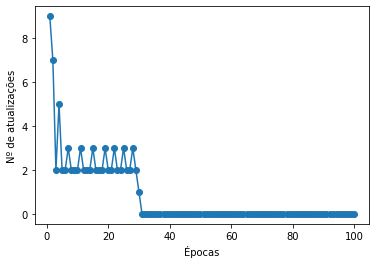

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


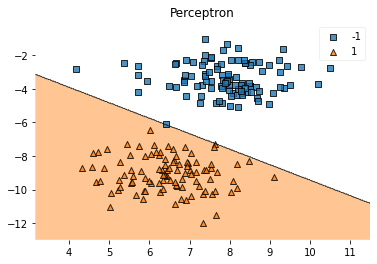

In [43]:
ppn = Perceptron(n_iter=100, eta=0.02)
X = blobs[0]                                                            # entrada dos dados
y = blobs[1]                                                            # saída dos dados
y[y == 0] = -1                                                          # substituir as classes 0 e 1 para 1 e -1
ppn.fit(X, y)                                                           # treinando o perceptron; classe 1 é a que desejamos encontrar

plt.plot(range(1, len(ppn.errors_) +1),                                 # plotando o gráfico de atualizações por época
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

plot_decision_regions(X, y, clf=ppn)                                    # plotando a fronteira de decisão
plt.title('Perceptron')
plt.show()

###Taxa de aprendizado: 0.003

#### &bull; Com 10 épocas

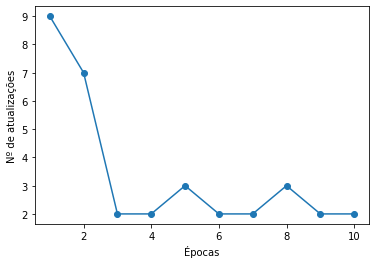

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


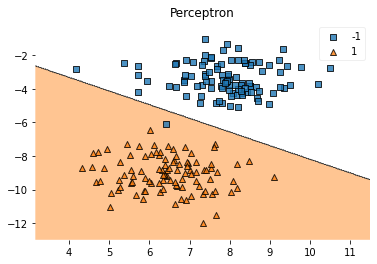

In [44]:
ppn = Perceptron(n_iter=10, eta=0.003)
X = blobs[0]                                                            # entrada dos dados
y = blobs[1]                                                            # saída dos dados
y[y == 0] = -1                                                          # substituir as classes 0 e 1 para 1 e -1
ppn.fit(X, y)                                                           # treinando o perceptron; classe 1 é a que desejamos encontrar

plt.plot(range(1, len(ppn.errors_) +1),                                 # plotando o gráfico de atualizações por época
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

plot_decision_regions(X, y, clf=ppn)                                    # plotando a fronteira de decisão
plt.title('Perceptron')
plt.show()

#### &bull; Com 50 épocas

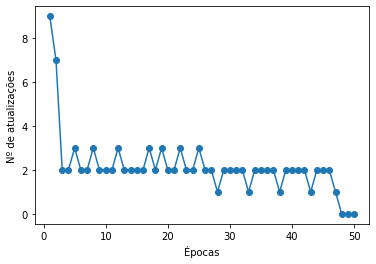

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


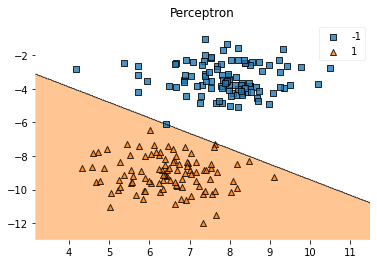

In [45]:
ppn = Perceptron(n_iter=50, eta=0.003)
X = blobs[0]                                                            # entrada dos dados
y = blobs[1]                                                            # saída dos dados
y[y == 0] = -1                                                          # substituir as classes 0 e 1 para 1 e -1
ppn.fit(X, y)                                                           # treinando o perceptron; classe 1 é a que desejamos encontrar

plt.plot(range(1, len(ppn.errors_) +1),                                 # plotando o gráfico de atualizações por época
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

plot_decision_regions(X, y, clf=ppn)                                    # plotando a fronteira de decisão
plt.title('Perceptron')
plt.show()

#### &bull; Com 100 épocas

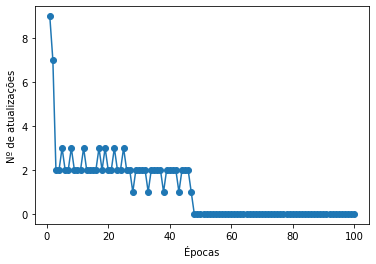

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


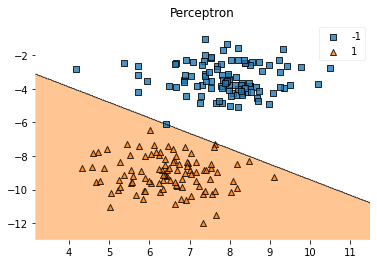

In [46]:
ppn = Perceptron(n_iter=100, eta=0.003)
X = blobs[0]                                                            # entrada dos dados
y = blobs[1]                                                            # saída dos dados
y[y == 0] = -1                                                          # substituir as classes 0 e 1 para 1 e -1
ppn.fit(X, y)                                                           # treinando o perceptron; classe 1 é a que desejamos encontrar

plt.plot(range(1, len(ppn.errors_) +1),                                 # plotando o gráfico de atualizações por época
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

plot_decision_regions(X, y, clf=ppn)                                    # plotando a fronteira de decisão
plt.title('Perceptron')
plt.show()

# Segundo Conjunto
*random_state*: 30

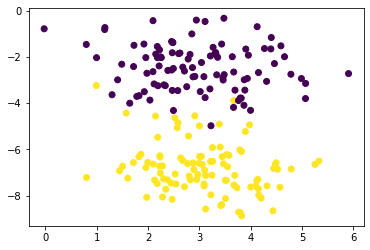

In [47]:
blobs = make_blobs(n_samples=200, n_features=2, centers=2, random_state=30)
plt.scatter(blobs[0][:,0], blobs[0][:,1], c=blobs[1])
plt.show()

###Taxa de aprendizado: 0.02

#### &bull; Com 10 épocas

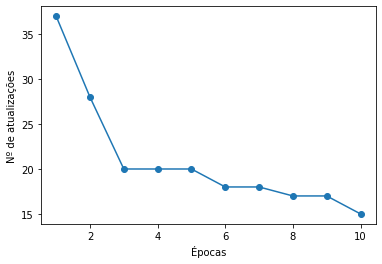

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


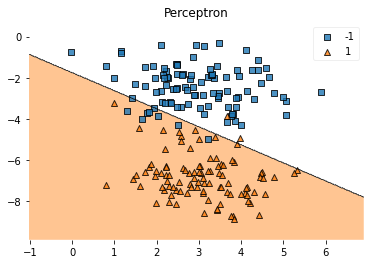

In [48]:
ppn = Perceptron(n_iter=10, eta=0.02)
X = blobs[0]                                                            # entrada dos dados
y = blobs[1]                                                            # saída dos dados
y[y == 0] = -1                                                          # substituir as classes 0 e 1 para 1 e -1
ppn.fit(X, y)                                                           # treinando o perceptron; classe 1 é a que desejamos encontrar

plt.plot(range(1, len(ppn.errors_) +1),                                 # plotando o gráfico de atualizações por época
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

plot_decision_regions(X, y, clf=ppn)                                    # plotando a fronteira de decisão
plt.title('Perceptron')
plt.show()

#### &bull; Com 50 épocas

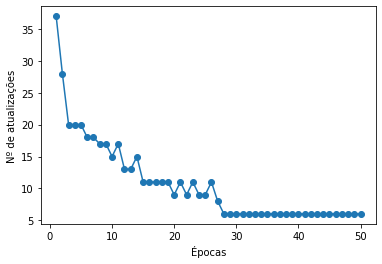

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


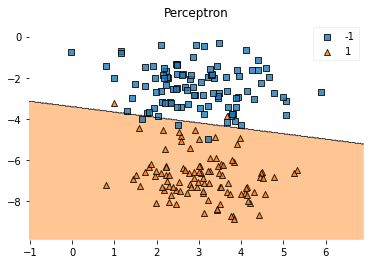

In [49]:
ppn = Perceptron(n_iter=50, eta=0.02)
X = blobs[0]                                                            # entrada dos dados
y = blobs[1]                                                            # saída dos dados
y[y == 0] = -1                                                          # substituir as classes 0 e 1 para 1 e -1
ppn.fit(X, y)                                                           # treinando o perceptron; classe 1 é a que desejamos encontrar

plt.plot(range(1, len(ppn.errors_) +1),                                 # plotando o gráfico de atualizações por época
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

plot_decision_regions(X, y, clf=ppn)                                    # plotando a fronteira de decisão
plt.title('Perceptron')
plt.show()

#### &bull; Com 100 épocas

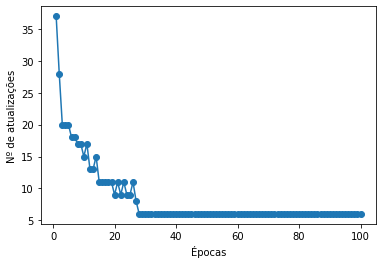

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


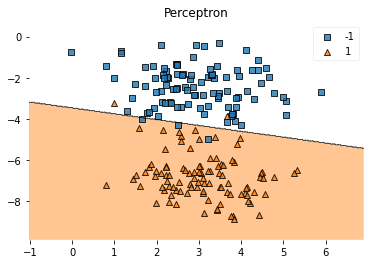

In [50]:
ppn = Perceptron(n_iter=100, eta=0.02)
X = blobs[0]                                                            # entrada dos dados
y = blobs[1]                                                            # saída dos dados
y[y == 0] = -1                                                          # substituir as classes 0 e 1 para 1 e -1
ppn.fit(X, y)                                                           # treinando o perceptron; classe 1 é a que desejamos encontrar

plt.plot(range(1, len(ppn.errors_) +1),                                 # plotando o gráfico de atualizações por época
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

plot_decision_regions(X, y, clf=ppn)                                    # plotando a fronteira de decisão
plt.title('Perceptron')
plt.show()

###Taxa de aprendizado: 0.003

#### &bull; Com 10 épocas

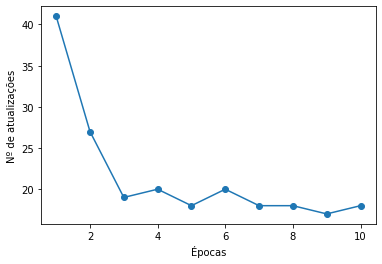

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


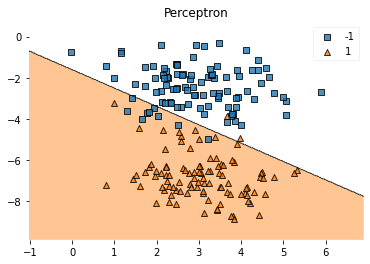

In [51]:
ppn = Perceptron(n_iter=10, eta=0.003)
X = blobs[0]                                                            # entrada dos dados
y = blobs[1]                                                            # saída dos dados
y[y == 0] = -1                                                          # substituir as classes 0 e 1 para 1 e -1
ppn.fit(X, y)                                                           # treinando o perceptron; classe 1 é a que desejamos encontrar

plt.plot(range(1, len(ppn.errors_) +1),                                 # plotando o gráfico de atualizações por época
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

plot_decision_regions(X, y, clf=ppn)                                    # plotando a fronteira de decisão
plt.title('Perceptron')
plt.show()

#### &bull; Com 50 épocas

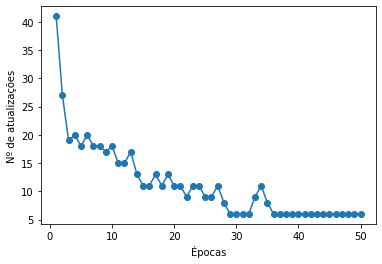

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


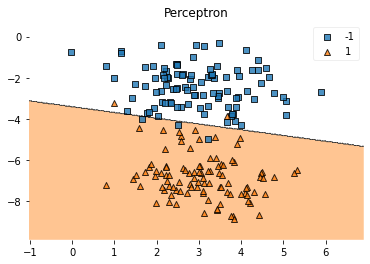

In [52]:
ppn = Perceptron(n_iter=50, eta=0.003)
X = blobs[0]                                                            # entrada dos dados
y = blobs[1]                                                            # saída dos dados
y[y == 0] = -1                                                          # substituir as classes 0 e 1 para 1 e -1
ppn.fit(X, y)                                                           # treinando o perceptron; classe 1 é a que desejamos encontrar

plt.plot(range(1, len(ppn.errors_) +1),                                 # plotando o gráfico de atualizações por época
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

plot_decision_regions(X, y, clf=ppn)                                    # plotando a fronteira de decisão
plt.title('Perceptron')
plt.show()

#### &bull; Com 100 épocas

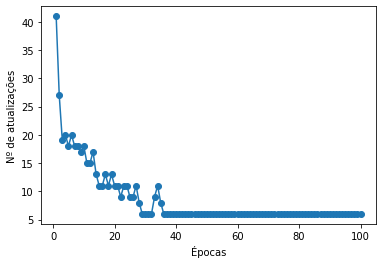

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


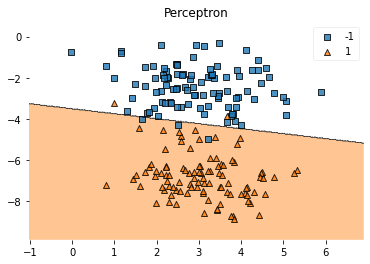

In [53]:
ppn = Perceptron(n_iter=100, eta=0.003)
X = blobs[0]                                                            # entrada dos dados
y = blobs[1]                                                            # saída dos dados
y[y == 0] = -1                                                          # substituir as classes 0 e 1 para 1 e -1
ppn.fit(X, y)                                                           # treinando o perceptron; classe 1 é a que desejamos encontrar

plt.plot(range(1, len(ppn.errors_) +1),                                 # plotando o gráfico de atualizações por época
        ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Nº de atualizações')
plt.show()

plot_decision_regions(X, y, clf=ppn)                                    # plotando a fronteira de decisão
plt.title('Perceptron')
plt.show()